# Исследование объявлений о продажах квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откыть файл с данными и изучитьобщую информацию. 

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(data.head(10))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

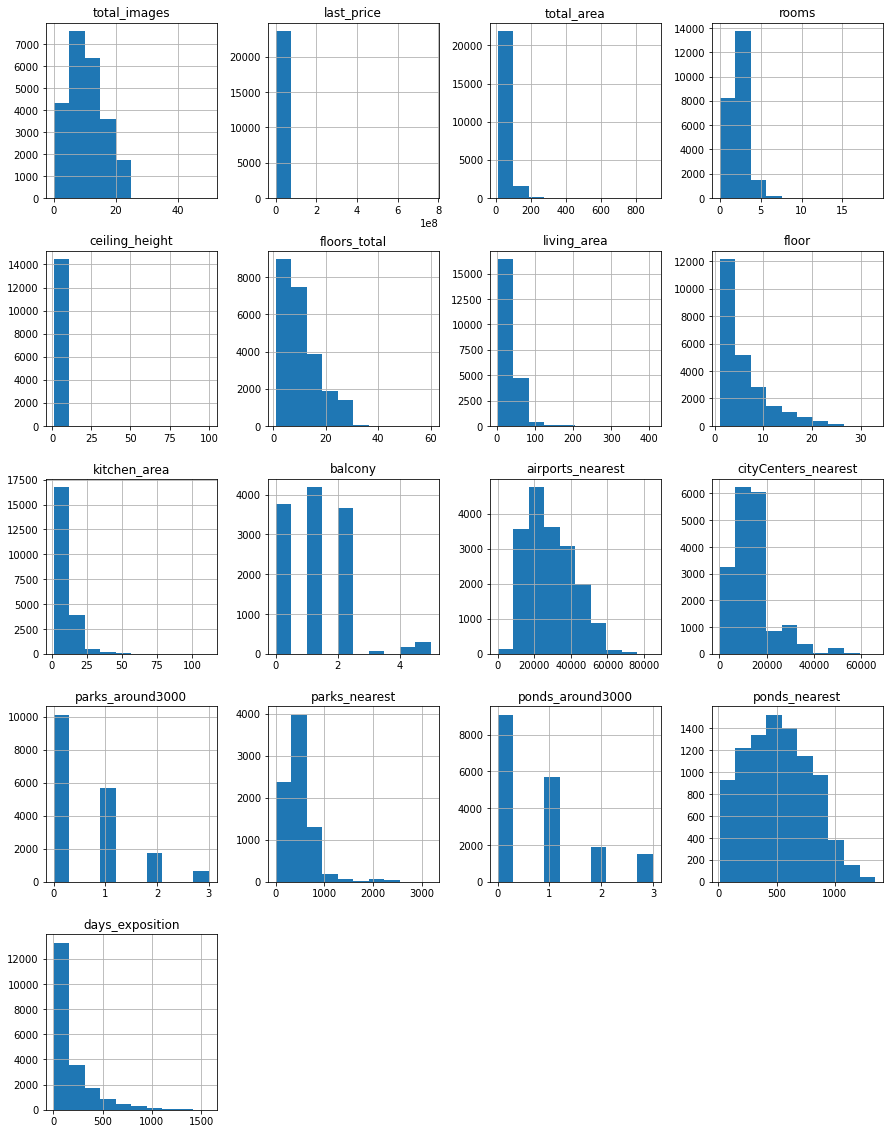

In [5]:
data.hist(figsize=(15, 20))

### Предобработка данных

In [6]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Начнем заполнение пропущенных значений с количества балконов (так как это пример уже был рассмотрен) 
Скорее всего, раз это значение не было указано, оно рано нулю, потому что некоторые не указывают то, чего нет. 
Аналогичным способом можно заполнить пропуски в следующих колонках:
parks_around3000 
ponds_around3000
Заполним пропуски. 

In [7]:
data['balcony']=data['balcony'].fillna(value=0)
print(data['balcony'].value_counts())
print(data['balcony'].isna().sum())

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64
0


In [8]:
data['parks_around3000']=data['parks_around3000'].fillna(value=0)
print(data['parks_around3000'].value_counts())
print(data['parks_around3000'].isna().sum())

0.0    15624
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64
0


In [9]:
data['ponds_around3000']=data['ponds_around3000'].fillna(value=0)
print(data['ponds_around3000'].value_counts())
print(data['ponds_around3000'].isna().sum())

0.0    14589
1.0     5717
2.0     1892
3.0     1501
Name: ponds_around3000, dtype: int64
0


In [10]:
print(data['floors_total'].value_counts())

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64


Поскольку практически все значения колонки 'floors_total' > 1, при чем значений =1 всего 25, 
можно смело предположить, что практически вся недвижимость датафрейма - квартиры. 
Учитыввая это можем заменить пустые значения в 'is_apartment' на 1

In [11]:
data['is_apartment']=data['is_apartment'].fillna(value=True)
print(data['is_apartment'].value_counts())
print(data['is_apartment'].isna().sum())

True     20974
False     2725
Name: is_apartment, dtype: int64
0


In [12]:
#print(data['is_apartment'].value_counts())

In [13]:
#print(data['is_apartment'].value_counts())
data['is_apartment'] = data['is_apartment'].astype(bool)
print(data['is_apartment'].value_counts())

True     20974
False     2725
Name: is_apartment, dtype: int64


In [14]:
data_empty_area = data.loc[data['living_area'].isna() | data['kitchen_area'].isna()]
data_empty_area.shape

(2717, 22)

Я выдвигаю несколько тезисов на основе наблюдений: 
метраж - очень важная метрика, влияющая на цену жилья. 
пропуски в living_area и kitchen_area лучше заполнить, чем удалить строки с пустыми данными, поскольку потеряем около 12% всех данных. 
Существует довольно сильная корреляция между общай пложадью и жилой площадью или площадью кухни. 
Если эта корреляция выше 0,7, тогда мы заполним пропуски при помощи среднего соотношения данных величин. 

In [15]:
data_experiment = data.loc[(~ data['living_area'].isna()) & (~ data['kitchen_area'].isna())]
data_experiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20982 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          20982 non-null  int64  
 1   last_price            20982 non-null  float64
 2   total_area            20982 non-null  float64
 3   first_day_exposition  20982 non-null  object 
 4   rooms                 20982 non-null  int64  
 5   ceiling_height        13336 non-null  float64
 6   floors_total          20943 non-null  float64
 7   living_area           20982 non-null  float64
 8   floor                 20982 non-null  int64  
 9   is_apartment          20982 non-null  bool   
 10  studio                20982 non-null  bool   
 11  open_plan             20982 non-null  bool   
 12  kitchen_area          20982 non-null  float64
 13  balcony               20982 non-null  float64
 14  locality_name         20943 non-null  object 
 15  airports_nearest   

In [16]:
print(data_experiment['total_area'].corr(data_experiment['living_area']))
print(data_experiment['total_area'].corr(data_experiment['kitchen_area']))

0.9394915889905385
0.6090972015140784


Получается, что корреляция между общей площадью и жилой значительно сильней, чем между общей и кухней. 
Тем не менее мы не можем убрать пропуски по кухне, а пропуски по жилой площади заполнить, поскольку среди них слишком много смежных значений. 
Таким образом движимые положительным впечатлением от первой цифры корреляции и получив среднюю корреляцию 0,77 , которая выше изначально обозначенного значения 0,7 (а также желанием впомнить, как писать цикл для заполнения пропусков) мы готовы приступить к заполнению пропусков по этим столбцам. 

In [17]:
living_total = data_experiment['living_area'].mean()/data_experiment['total_area'].mean()
kitchen_total = data_experiment['kitchen_area'].mean()/data_experiment['total_area'].mean()
print(living_total)
print(kitchen_total)

0.5721869975479366
0.17369869084038206


In [18]:
for i in data.loc[data['living_area'].isna()].index:
    data.loc[i, 'living_area'] = data.loc[i, 'total_area']*living_total
print(data['living_area'].isna().sum())

0


In [19]:
for i in data.loc[data['kitchen_area'].isna()].index:
    data.loc[i, 'kitchen_area'] = data.loc[i, 'total_area']*kitchen_total
print(data['kitchen_area'].isna().sum())

0


В столбце floors_total закономерностей я не заметил, поэтому пока оставим как есть, будет мешать - удалим нули,там всего 86 значений. 
В ceiling_hieght аномалий и закономерностей не заметил. 
В locality_name, после просмотра данных, у меня создалось ощущение, что эти данные были не указаны, поскольку город Санкт Петербуг (или по крайней мере пригород) и, возможно, это казалось очевидным при заполнении данных. Наблюдения основаны на удаленности от аэропорта и центра города. Оба эти показателя присутствуют и в рамках адекватных для квартир в СПБ.

In [20]:
print("среднее расстояни от центра", data['cityCenters_nearest'].mean())
print(data['locality_name'].value_counts().head(50))

среднее расстояни от центра 14191.277832783278
Санкт-Петербург                            15721
посёлок Мурино                               522
посёлок Шушары                               440
Всеволожск                                   398
Пушкин                                       369
Колпино                                      338
посёлок Парголово                            327
Гатчина                                      307
деревня Кудрово                              299
Выборг                                       237
Петергоф                                     201
Сестрорецк                                   183
Красное Село                                 178
Кудрово                                      173
деревня Новое Девяткино                      144
Сертолово                                    142
Ломоносов                                    133
Кириши                                       125
Сланцы                                       112
Волхов                

In [21]:
print ('Дубликатов в таблице:', data.duplicated().sum())

Дубликатов в таблице: 0


Большого количества неявных дупликатов не наблюдается, но можно обратить внимание, что где-то написано "посёлок", а где-то "поселок". Попробуем привести к общемк знаменателю и посмотрим, что поменяется. 

In [23]:
import numpy as np
data_check_1 = data.loc[data['locality_name'].str.contains(r'посёлок')==True]
print(data_check_1.groupby('locality_name')['living_area'].count().sort_values(ascending = False).head(30))

locality_name
посёлок Мурино                             522
посёлок Шушары                             440
посёлок Парголово                          327
посёлок Бугры                               69
посёлок Металлострой                        66
городской посёлок Янино-1                   61
посёлок Стрельна                            44
посёлок Тельмана                            39
посёлок городского типа Сиверский           29
городской посёлок Новоселье                 28
городской посёлок Мга                       27
посёлок Щеглово                             23
посёлок городского типа Кузьмоловский       22
посёлок Новогорелово                        20
посёлок Понтонный                           20
посёлок Сосново                             18
посёлок Новый Свет                          17
посёлок городского типа имени Морозова      17
посёлок городского типа Токсово             16
посёлок городского типа Рощино              15
городской посёлок Назия                     15

In [24]:
data_check_2 = data.loc[data['locality_name'].str.contains(r'поселок')==True]
print(data_check_2.groupby('locality_name')['living_area'].count().sort_values(ascending = False).head(30))

locality_name
поселок Бугры                              45
поселок Романовка                          36
поселок Мурино                             34
поселок городского типа имени Свердлова    25
поселок городского типа Синявино           21
поселок городского типа Рощино             19
городской поселок Большая Ижора            16
поселок городского типа Рахья              15
поселок городского типа Дубровка           15
поселок городского типа Кузьмоловский      13
поселок Елизаветино                        13
поселок городского типа Вырица             12
поселок Войсковицы                         10
поселок Молодцово                           9
поселок городского типа Приладожский        9
поселок Сельцо                              9
поселок городского типа Советский           9
поселок Запорожское                         8
поселок Суходолье                           8
поселок Первомайское                        8
поселок городского типа Никольский          7
поселок Углово      

К моему сожалению, повторения есть и их не так мало, а по выводить на экран по 100 значений каждого типа, вычленять неявные дубликаты и точечно заменять их я не готов, поэтому принимаю волевое решение избавиться от буквы "ё". И посчитаем значения, чтобы понять, сколько же мы дубликатов так убрали. 

In [25]:
print(data['locality_name'].nunique())

364


In [26]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')
print(data['locality_name'].nunique())

330


Убрали 34 дубликата и параллельно освоили новую методику. Мне нравится. Проверим, что получилось.

In [27]:
print(data['locality_name'].value_counts().head(50))

Санкт-Петербург                            15721
поселок Мурино                               556
поселок Шушары                               440
Всеволожск                                   398
Пушкин                                       369
Колпино                                      338
поселок Парголово                            327
Гатчина                                      307
деревня Кудрово                              299
Выборг                                       237
Петергоф                                     201
Сестрорецк                                   183
Красное Село                                 178
Кудрово                                      173
деревня Новое Девяткино                      144
Сертолово                                    142
Ломоносов                                    133
Кириши                                       125
поселок Бугры                                114
Сланцы                                       112
Волхов              

In [28]:
# data['locality_name'] = data['locality_name'].str.replace('поселок ','')
# print(data['locality_name'].nunique())
# ответ был 328

In [29]:
data['locality_name'] = data['locality_name'].where(data['locality_name'] != 'Мурино', 'поселок Мурино')
print(data['locality_name'].nunique())

329


А вот поселок убирать уже нехорошо ради 2 значений (я проверил, код выше закомментирован, чтобы было понятно, как к этому пришли). Вот обнаружили мы Мурино - его и поменяли, а с одним неявным дубликатом так уж и быть проживем. Код закомментирую, чтобы было понятно, как к этому пришли. 

In [30]:
#data['parks_nearest']=data['parks_nearest'].fillna(value=11111)
#print(data[(data['parks_nearest']!= 11111) & (data['parks_around3000']==0)]['floor'].count())
#data['ponds_nearest']=data['ponds_nearest'].fillna(value=11111)
#print(data[(data['ponds_nearest']!= 11111) & (data['ponds_around3000']==0)]['floor'].count())

Попытыались выяснить, что значит NaN в двух выщеуказанных столбцах. 
В первом случае есть только 4 варианта, во втором ни одного. Значит: 
    1)эти 4 случая аномальные
    2)если в люом значении "nearest" стоит NaN, значит, рядом нет ничего в радиусе 3000м, а 4 или 5 км до пруда уже никто и не указывает, да и нам это одинаково. 
P.S. 
Забегая вперед и посмотрев задание по анализу, я вижу, что скорее всего, нам придется строить гистограммы и искать закономерности в удаленности. И для этой цели любые заполнения пропусков в данных колонках я считаю некорректными.
А на основе трети данных строить какие-то графики я бы вообще не стал. 
И в принципе я придумал, что с этим можно сделать, и, если получится, так и поступлю. Я бы просто распределил по классам в зависимости от удаленности. И уже потом анализировал. Да, это буедет куда менее показательно, зато наделено смыслом. 
В любом случае заполнять пропуски отказываюсь. 

In [31]:
#data.info()
#print(data.isna().sum())

In [32]:
data = data.drop(data[data['floors_total'].isna()==True].index)
data = data.drop(data[data['locality_name'].isna()==True].index)

In [33]:
#data.info()
#print(data.isna().sum())

In [34]:
data['parks_around3000'] = data['parks_around3000'].astype(int)
print(data['parks_around3000'].value_counts())
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
print(data['ponds_around3000'].value_counts())
data['balcony'] = data['balcony'].astype(int)
print(data['balcony'].value_counts())
data['floors_total'] = data['floors_total'].astype(int)
#data['days_exposition'] = data['days_exposition'].astype(int)
data.info()

0    15539
1     5647
2     1736
3      643
Name: parks_around3000, dtype: int64
0    14529
1     5662
2     1883
3     1491
Name: ponds_around3000, dtype: int64
0    15155
1     4187
2     3656
5      304
4      182
3       81
Name: balcony, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  int64  
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio            

Интересно посмотреть, что за квартиры такие с 4 и 5 балконами. Это какие-то гигантские особняки ли это кривые данные? Скорее всего, реально кривые, потому что этих значений больше, чем квартир с 3мя балконами. Попробуем выяснить. 

In [35]:
print(data[(data['balcony']==4) | (data['balcony']==5)].head(30))

      total_images  last_price  total_area first_day_exposition  rooms  \
41              16   7900000.0        74.0  2016-05-04T00:00:00      3   
42              13  22000000.0       161.8  2015-07-08T00:00:00      4   
116             18  10999000.0        97.2  2017-11-13T00:00:00      3   
121             20  33000000.0       180.0  2017-02-17T00:00:00      3   
250             13   3200000.0        51.7  2019-01-22T00:00:00      2   
263             12  39900000.0       140.6  2016-11-19T00:00:00      2   
267              2  14700000.0       120.0  2018-09-07T00:00:00      3   
311             20  12500000.0        86.0  2018-10-19T00:00:00      3   
336             10   7700000.0        79.0  2019-03-11T00:00:00      3   
371             11   7300000.0        65.0  2018-09-12T00:00:00      2   
375             20  25000000.0       140.0  2017-11-25T00:00:00      3   
409              5   6600000.0        73.0  2017-08-15T00:00:00      3   
435              6   6800000.0        

Жилплощадь 30-80 м2, и 5 балконов. Все очевидно, на мой взгляд. Придется попрощаться со значениями. 

In [36]:
data = data.drop(data[(data['balcony']==4) | (data['balcony']==5)].index)
print(data['balcony'].value_counts())

0    15155
1     4187
2     3656
3       81
Name: balcony, dtype: int64


Теперь самое веселое: 
    Переведем first_day_exposition в date_time
    Переведем days_exposition в целые числа
    Найдем на какую дату был сделан расчет days_exposition
    При помощи first_day_exposition и рассчитанной даты вычислим days_exposition там, где он не заполнен
    Переведем в формат int
    
(И да я совсем забыл, что у нас нет времени, только дата, но тем лучше для нас по идее)

In [37]:
#2019-03-07T00:00:00 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#'%d.%m.%YZ%H:%M:%S'
print(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


In [38]:
data_calc = data.drop(data[data['days_exposition'].isna()==True].index)
#data_calc.reset_index(drop=True)
print(data_calc['days_exposition'].isna().sum())

0


In [39]:
#data_calc.reset_index(drop=True)
# И все равно ингдексы начинаются с 1, не знаю, что я не так сделал... 
# для исследования пока изучим индексы без 0, но очень прошу объяснить мою ошибку
# UPD я все понял и смог применить - дальше все будет видно. 
# Переделывать не стал, потому что эта часть работы оказалась не такой полезной с точки зрения исследования. 

In [40]:
data_calc['days_exposition'] = data_calc['days_exposition'].astype(int)
data_calc['days_exposition'].dtype

dtype('int64')

In [41]:
print(data_calc.loc[:,['days_exposition', 'first_day_exposition']].head(6))

   days_exposition first_day_exposition
1               81           2018-12-04
2              558           2015-08-20
3              424           2015-07-24
4              121           2018-06-19
5               55           2018-09-10
6              155           2017-11-02


In [42]:
the_date=[]
for i in range(1,6):
    the_date.append(data_calc.loc[i,'first_day_exposition'] + pd.Timedelta(days=data_calc.loc[i,'days_exposition']))
print(the_date)

[Timestamp('2019-02-23 00:00:00'), Timestamp('2017-02-28 00:00:00'), Timestamp('2016-09-20 00:00:00'), Timestamp('2018-10-18 00:00:00'), Timestamp('2018-11-04 00:00:00')]


И мы выяснили, что не сможем таким способом вычислить дату составления списка, а если бы и могли, то нам бы это все равно ничего не дало. days_exposition сожержит данные о количестве дней на сайте перед снятием. 
Причиной снятия может служить не только продажа, но и изменение решения продавца о продаже квартиры. 
Пропуск в данном случае может значить 2 вещи :
1)объявление снято в первый день и соответственнно не провисело на сайте и дня. Продана ли квартира в таком случае? скорее нет, так быстро такие серьезные дела не делаются, особенно в 15% случаев, это было бы настоящее чудо.
Значит, если наша 1я теория верна, то объявление было просто снято владельцем без продажи. 
И это значит, что потом могли быть поданы дубликаты с другой ценой... но проверить это сложно.
2)Объявление до сих пор висит. Не совсем верю, но предполагаю. Если данные рассчитываются автоматически, то посчиталось бы от для сбора данных и пропуски были бы запонены. 

Это тот момент, когда надо срочно бежать к тем, кто предоставил данные и выяснять причину возникновения и как собирались данные. 
Но, поскольку сделать этого мы не можем, мы эти данные просто удалим. 
и вот, почему: 
Я выдвигаю свое предположение (мнение), что главный показатель на рынке недвижимости - это цена. Актуальность цены подтверждается совершенной сделкой купли-продажи. Если квартира не продана (а в обоих гипотетичских вариантах она не продана), то следует предпположить, что цена в объявлении неактуальна (ведь собственник может внести в этом поле любую цифру, которую ему вздумается). 
Я готов выслушать любые контраргументы, но пока что от значений нам придется избавиться во благо проекта.

In [43]:
data = data.drop(data[data['days_exposition'].isna()==True].index)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20003 entries, 1 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20003 non-null  int64         
 1   last_price            20003 non-null  float64       
 2   total_area            20003 non-null  float64       
 3   first_day_exposition  20003 non-null  datetime64[ns]
 4   rooms                 20003 non-null  int64         
 5   ceiling_height        11750 non-null  float64       
 6   floors_total          20003 non-null  int64         
 7   living_area           20003 non-null  float64       
 8   floor                 20003 non-null  int64         
 9   is_apartment          20003 non-null  bool          
 10  studio                20003 non-null  bool          
 11  open_plan             20003 non-null  bool          
 12  kitchen_area          20003 non-null  float64       
 13  balcony         

<AxesSubplot:>

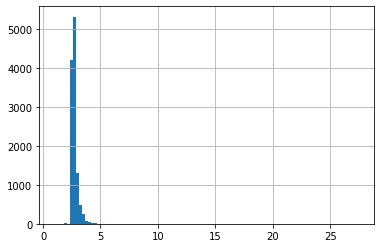

In [45]:
data['ceiling_height'].hist(bins=100)

In [46]:
data_anomaly = data.loc[data['ceiling_height']>6]

In [47]:
print(data_anomaly['ceiling_height'])

355      25.0
3474      8.0
4643     25.0
4876     27.0
5076     24.0
5246     27.0
5669     26.0
5863      8.3
10773    27.0
11285    25.0
14382    25.0
15061    14.0
15743     8.0
17442     8.0
17857    27.0
18545    25.0
20478    27.0
20507    22.6
21377    27.5
22309    10.3
22938    27.0
Name: ceiling_height, dtype: float64


А вот и аномалии, которых на гистограмме не видно. 
Если в потолками >20 метров понятно - там запятая неправильно стоит, то что делать со значениями 8, 10? 
На 10 их не разделить

In [48]:
#print(data.loc[{3474, 5863, 15743, 17422, 22309}])
# И в добавок все это в кравртирах... чего уж у остальных в этих домах не все так прекрасно? 

In [49]:
for i in data[data['ceiling_height']>20].index:
    data.loc[i, 'ceiling_height'] = data.loc[i, 'ceiling_height']/10

In [50]:
print(data.loc[5669])

total_images                              4
last_price                        4400000.0
total_area                             50.0
first_day_exposition    2017-08-08 00:00:00
rooms                                     2
ceiling_height                          2.6
floors_total                              9
living_area                            21.3
floor                                     3
is_apartment                           True
studio                                False
open_plan                             False
kitchen_area                            7.0
balcony                                   2
locality_name               Санкт-Петербург
airports_nearest                    28981.0
cityCenters_nearest                 10912.0
parks_around3000                          1
parks_nearest                         305.0
ponds_around3000                          0
ponds_nearest                           NaN
days_exposition                       267.0
Name: 5669, dtype: object


In [51]:
data_anomaly = data.loc[data['ceiling_height']>6]

In [52]:
print(data_anomaly['ceiling_height'])

3474      8.0
5863      8.3
15061    14.0
15743     8.0
17442     8.0
22309    10.3
Name: ceiling_height, dtype: float64


А от этих значений все-таки избавимся... 

In [53]:
data = data.drop(data[data['ceiling_height']>6].index)
#data_calc = data.drop(data[data['days_exposition'].isna()==True].index)

In [54]:
print(data['ceiling_height'].head(50))

1      NaN
2      NaN
3      NaN
4     3.03
5      NaN
6      NaN
8      NaN
9     2.50
10    2.67
11     NaN
12     NaN
13    2.56
14     NaN
15     NaN
16    3.05
17     NaN
18    2.50
19    2.75
20    2.70
21     NaN
22    2.75
23    2.60
24     NaN
25    2.75
26     NaN
27    2.60
28    2.90
29     NaN
30     NaN
31    2.80
32     NaN
33     NaN
34    2.55
35     NaN
36     NaN
37    2.50
38    2.75
39    2.75
40    2.60
43    3.00
47     NaN
48     NaN
50    2.70
51    3.20
53     NaN
54     NaN
55    2.60
56    2.80
57     NaN
58    2.60
Name: ceiling_height, dtype: float64


теперь сбросим индексы для порядка. 

In [55]:
data = data.reset_index(drop=True)

In [56]:
print(data['ceiling_height'].tail())

19992    2.75
19993     NaN
19994    2.60
19995     NaN
19996    3.00
Name: ceiling_height, dtype: float64


Ну и, наверное, моожно запонить пропуски в занчениях высоты потолков медианами, например, но это аж 40% значений. 
Так что если мне потребуется для исследования - так, возможно, и поступлю. 
Но заранее на такие упрощения я пойти не готов. 

### Создание новых признаков

In [57]:
data['price_sqm'] = data['last_price']/data['total_area']
#print(data.head())

In [58]:
data['adv_weekday'] = data['first_day_exposition'].dt.weekday
#print(data.head())

In [59]:
data['adv_month'] = data['first_day_exposition'].dt.month
data['adv_year'] = data['first_day_exposition'].dt.year
#print(data.head())

Итак мы сделеали и добавили в таблицу 4 столбца: 
цена квадратного метра, день недели, месяц, год. 
Следующий шаг - категоризировать этажи. 

In [60]:
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return "другой"

In [61]:
#df_subset = data.loc[:,{'floor','floors_total'}]
#print(df_subset.head())
#data['floor_group'] = df_subset.apply(categorize_floor, axis=1)
#print(data.head())
# Это была первая и оооочень долгая попытка и она сработала. На ее основе получилось сделать проще. 

In [62]:
data['floor_group'] = data[['floor', 'floors_total']].apply(categorize_floor, axis=1)
#print(data.head())

 Осталось перевести расстояние до центра в километры и округлить до целых чисел. 
 И тут появляется проблем - без удаления пропусков до целых чисел не округлить. 
 Придется нам изменить ранее принятое решение по этой колонке и удалить пропуски, потому что
 чтобы заполнить их у нас совсем нет данных. 

In [63]:
print(data.groupby('locality_name')['cityCenters_nearest'].mean().head(30))

locality_name
Бокситогорск              NaN
Волосово                  NaN
Волхов                    NaN
Всеволожск                NaN
Выборг                    NaN
Высоцк                    NaN
Гатчина                   NaN
Зеленогорск      54742.047619
Ивангород                 NaN
Каменногорск              NaN
Кингисепп                 NaN
Кириши                    NaN
Кировск                   NaN
Колпино          32087.829431
Коммунар                  NaN
Красное Село     30023.326531
Кронштадт        49135.915663
Кудрово                   NaN
Лодейное Поле             NaN
Ломоносов        50748.893805
Луга                      NaN
Любань                    NaN
Никольское                NaN
Новая Ладога              NaN
Отрадное                  NaN
Павловск         33214.032258
Петергоф         35036.566474
Пикалево                  NaN
Подпорожье                NaN
Приморск                  NaN
Name: cityCenters_nearest, dtype: float64


А потому что все просто - пропуски вызваны тем, что пропуски исключительно в городках. 
А все городки мы удалять пока не хотим, как уже было объяснено выше. К тому же это четверть значений. 
Предлагаю компромисс - тип оставить float, а значения округлить

In [64]:
data['to_centre_km'] = (data['cityCenters_nearest']/1000)
data['to_centre_km'] = data['to_centre_km'].round(0)

In [65]:
print(data['to_centre_km'].head())

0    19.0
1    14.0
2     7.0
3     8.0
4     NaN
Name: to_centre_km, dtype: float64


### Исследовательский анализ данных

На этом этапе работы предлагаю определить, как мы будем изучать данные.
Базовый план будет выглядеть примерно так:
1)построить гистограмму
2)если построить любую другую диаграмму, если это даст нам лучшее понимание ситуации. 
3)убрать какие-то аномальные (вдруг, остались) значения, если они искажают картину (при чем иногда проще убрать их, ограничив пределы значений на графике).
4)найти корреляцию с ценой (для самых релевантных параметров)
5)оценить значимость параметра и сделать вывод.

Мы будем выполнять эти методы в любой последовательности, в зависимости от того, как нам будет удобней анализировать данные. 
Также мы можем использовать любые другие методы в случае необходимости. 

In [66]:
import matplotlib.pyplot as plt

In [67]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          19997 non-null  int64         
 1   last_price            19997 non-null  float64       
 2   total_area            19997 non-null  float64       
 3   first_day_exposition  19997 non-null  datetime64[ns]
 4   rooms                 19997 non-null  int64         
 5   ceiling_height        11744 non-null  float64       
 6   floors_total          19997 non-null  int64         
 7   living_area           19997 non-null  float64       
 8   floor                 19997 non-null  int64         
 9   is_apartment          19997 non-null  bool          
 10  studio                19997 non-null  bool          
 11  open_plan             19997 non-null  bool          
 12  kitchen_area          19997 non-null  float64       
 13  balcony         

<AxesSubplot:>

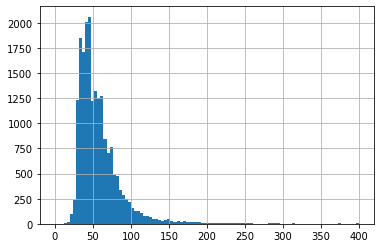

In [68]:
data['total_area'].hist(bins=100, range = (0,400))

In [69]:
print(data['total_area'].corr(data['last_price']))
print(data['total_area'].corr(data['days_exposition']))

0.6396068290822844
0.1516757802587721


Да, зависимость на лицо, но пока сложно назвать данный фактор важнейшим. 
Также неправильно рассматривать его юез сравнения с остальными.

<AxesSubplot:>

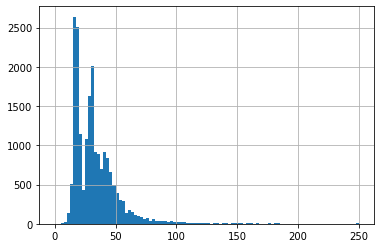

In [70]:
data['living_area'].hist(bins=100, range = (0,250))

In [71]:
print(data['living_area'].corr(data['last_price']))

0.5716237168571044


Не смотря на коээфициент корреляции > 0.5, что уже существенно, жилая площадь хуже коррелирует с ценой, чем общая. 

<AxesSubplot:>

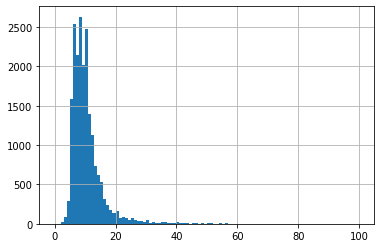

In [72]:
data['kitchen_area'].hist(bins=100, range = (0,100))

In [73]:
print(data['kitchen_area'].corr(data['last_price']))

0.50200130384707


От площади кухни цена зависит меньше, чем от жилой площади. 
Можем сделать вывод, что общая площадь объекта обладает большим влиянием на цену, чем площадь отдельной части квартиры. 

<AxesSubplot:>

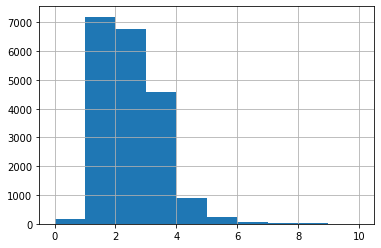

In [74]:
data['rooms'].hist(bins=10, range = (0,10))

In [75]:
print(data['rooms'].corr(data['last_price']))
print(data['rooms'].corr(data['days_exposition']))

0.35087774285713075
0.12785387754549116


 Количество комнат слабо влияет на цену. Оно и не удивительно, ведь количество комнат далеко не всегда корректно отображает даже общую площадь.

In [76]:
print(data['rooms'].corr(data['total_area']))
#вот, корреляция высока, но не определяющая.

0.7597520878724694


<AxesSubplot:>

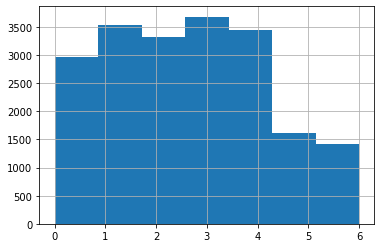

In [77]:
data['adv_weekday'].hist(bins=7)

В будни больше заявлений размещается.
Хочу обратить внимание, что мы будем это изучать только потому, что такое было в задании. 
И мы не посчитаем корреляцию, если для программы 1>2, а для нас это вторник и среда...

Но чтобы получить информацию, сделаем сводную табличку.

In [78]:
print(data.pivot_table(index=['adv_weekday'], values =['last_price'], aggfunc = ['count', 'mean', 'median']))

                 count          mean     median
            last_price    last_price last_price
adv_weekday                                    
0                 2970  6.104022e+06  4485000.0
1                 3530  6.041786e+06  4589500.0
2                 3329  6.365534e+06  4500000.0
3                 3681  6.316818e+06  4500000.0
4                 3440  6.009595e+06  4400000.0
5                 1620  6.844375e+06  4500000.0
6                 1427  5.946953e+06  4400000.0


In [79]:
print(data.pivot_table(index=['adv_weekday'], values =['days_exposition'], aggfunc = ['count', 'mean', 'median']))

                      count            mean          median
            days_exposition days_exposition days_exposition
adv_weekday                                                
0                      2970      184.362626            98.5
1                      3530      183.514164            94.0
2                      3329      187.923701            99.0
3                      3681      186.050530            97.0
4                      3440      171.557267            94.0
5                      1620      171.011728            96.0
6                      1427      168.103714            88.0


<AxesSubplot:xlabel='index'>

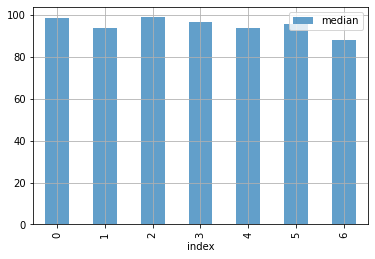

In [80]:
data_week = data.pivot_table(index=['adv_weekday'], values =['days_exposition'],
                             aggfunc = ['count', 'mean', 'median'])
data_week.columns = ['count', 'mean', 'median']
data_week['index'] = data_week.index
#print(data_week)
data_week.plot(
    x= 'index',
    y= 'median',
    kind='bar',
    alpha=0.7,
    label='median',
    grid=True,
    legend=True,
)

Не знаете, в какой день выставить квартиру на продажу? Если хотите продать быстрее - сделайте это в восресенье,
а вот если хотите дороже - выставляйте во вторник.
А за еще 1000 рублей наши лучшие ~~астрологи~~ аналитики помогут вам выбрать месяц для выставления объявления. 

<AxesSubplot:>

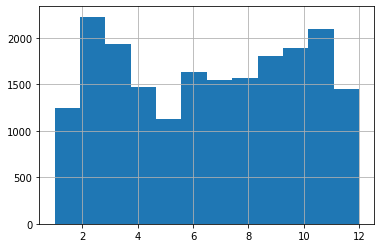

In [81]:
data['adv_month'].hist(bins=12)

Тут хотя бы какую-то сезонность можно выделить с минимальной точностью.

In [82]:
print(data.pivot_table(index=['adv_month'], values =['last_price'], aggfunc = ['count', 'mean', 'median']))

               count          mean     median
          last_price    last_price last_price
adv_month                                    
1               1246  6.154790e+06  4500000.0
2               2228  6.084852e+06  4500000.0
3               1937  5.825281e+06  4450000.0
4               1476  6.633619e+06  4500000.0
5               1130  6.469806e+06  4500000.0
6               1636  6.120033e+06  4335000.0
7               1543  6.387581e+06  4500000.0
8               1570  5.942366e+06  4500000.0
9               1805  6.677417e+06  4650000.0
10              1887  5.761281e+06  4490000.0
11              2091  6.044586e+06  4550000.0
12              1448  6.749786e+06  4510000.0


In [83]:
print(data.pivot_table(index=['adv_month'], values =['days_exposition'], aggfunc = ['count', 'mean', 'median']))

                    count            mean          median
          days_exposition days_exposition days_exposition
adv_month                                                
1                    1246      186.753612            88.0
2                    2228      170.241023            90.0
3                    1937      202.565823           109.0
4                    1476      200.477642           125.0
5                    1130      220.680531           134.0
6                    1636      193.042787           114.0
7                    1543      175.034997            92.0
8                    1570      153.487261            81.5
9                    1805      166.201662            89.0
10                   1887      160.847377            92.0
11                   2091      151.706361            74.0
12                   1448      217.992403            99.5


Тут хотя бы какую-то сезонность можно выделить с минимальной точностью. 

<AxesSubplot:>

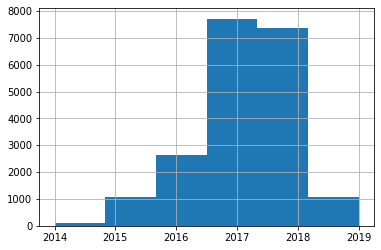

In [84]:
data['adv_year'].hist(bins=6)


Какие данные есть, такие и есть, я бы не стал делать никаких предположений о жилищном буме раньше времени.
И тем более на основе только этих данных.
А еще можно сделать поправку на диджитализацию, динамику развитие сайта (факторы, которые по этим данными мы точно не определим), на то, что в 2019 году данные только за 4 месяца. 
Хотя стоит отметить, что в 2019 в первые месяцы наблюдается существенный спад по сравнению в 2018 годом, но не с 2017, а ведь в 2017 году было зафиксировано наибольшее количество заявлений. Все это можно увидеть в сводной таблице ниже. 
Но, кажется, это только повод задать новые вопросы, а не сделать выводы.

In [85]:
print(data.pivot_table(index=['adv_year', 'adv_month'], values =['last_price'], aggfunc = ['count', 'mean', 'median']))

                        count          mean      median
                   last_price    last_price  last_price
adv_year adv_month                                     
2014     11                17  1.279153e+07  12561120.0
         12                97  1.107627e+07   6390000.0
2015     1                 55  1.468550e+07   6550000.0
         2                 58  7.983043e+06   5745000.0
         3                100  6.431720e+06   5400000.0
         4                 47  6.571625e+06   5239000.0
         5                 60  6.493371e+06   5125000.0
         6                 81  8.685556e+06   4600000.0
         7                 90  9.972571e+06   5125000.0
         8                 77  1.217608e+07   5350000.0
         9                 81  7.294576e+06   5999000.0
         10               137  6.673025e+06   4990000.0
         11               144  6.571968e+06   5100000.0
         12               148  8.372384e+06   4880000.0
2016     1                116  7.319000e+06   48

<AxesSubplot:>

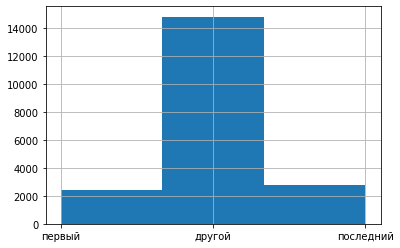

In [86]:
data['floor_group'].hist(bins=3)

In [87]:
print(data.pivot_table(index=['floor_group'], values =['last_price'], aggfunc = ['count', 'mean', 'median']))

                 count          mean     median
            last_price    last_price last_price
floor_group                                    
другой           14787  6.355089e+06  4650000.0
первый            2443  4.486201e+06  3800000.0
последний         2767  6.944063e+06  4217233.0


Первый этаж, похоже, немного недолюбливают. 
Последний этаж дороже в средней, но дешевле в медиане - думаю дело втом, что обычно он ценится чуть ниже, особенно в домах без лифтов), но бывают двухэтажные квартиры на верхних этажах и они, естественно, большие и дорогие.

<AxesSubplot:>

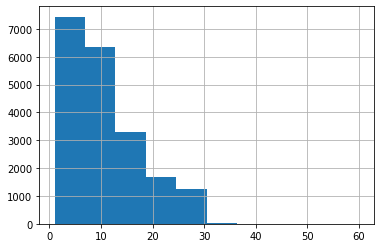

In [88]:
data['floors_total'].hist(bins=10)

Больше всего продается квартир в невысоких домах.

<AxesSubplot:>

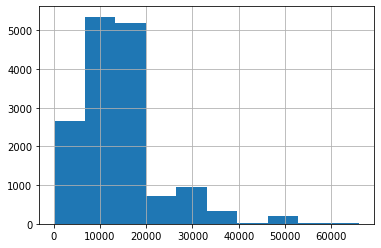

In [89]:
data['cityCenters_nearest'].hist(bins=10)

Большинство квартир находятся на расстоянии 10-20 км от центра.

<AxesSubplot:>

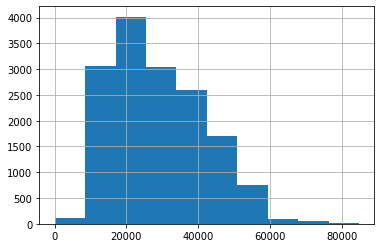

In [90]:
data['airports_nearest'].hist(bins=10)

Разброс значений относительно аэропорта выше, чем относительно центра. 
Все потому, что окраины примерно равномерно удалены от центра, но совсем неравномерно - от аэропорта.

<AxesSubplot:>

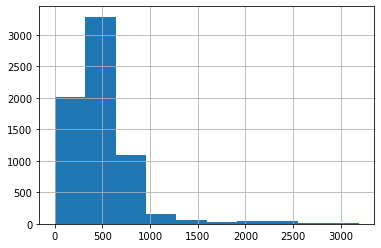

In [91]:
data['parks_nearest'].hist(bins=10)

Большинство парков находятся на расстоянии до 1000м от выставленных квартир.
Можно сделать предположение, что когда парк близко, его указывают и обращают внимание на расстояние.
Это наводит на мысль, что сам параметр неправильный. Лочгичнее и значимее был бы параметр "наличие парков на расстоянии 1 км".

<AxesSubplot:>

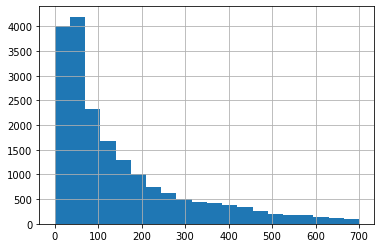

In [92]:
data['days_exposition'].hist(bins=20 ,range = (0,700))

Исходя их графика можно заключить следующее:

Большинство продаж осуществляются в срок до 100 дней. Это нормальная продажа
Продажи за меяц и раньше можно считать быстрыми. 
Продажи от 100 до 200 дней можно считать средне медленными. 
Продажи до 500 дней можно считать медленными, а дольше - слишком медленными. 
Пришлось сократить значения на графике до 700, чтобы он был наглядным. Когда будем удалять аномалии, избавимся и от этих.

In [93]:
print(data['last_price'].corr(data['days_exposition']))

0.08168862213903699


<AxesSubplot:xlabel='last_price', ylabel='days_exposition'>

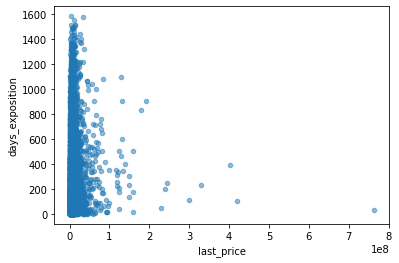

In [94]:
data.plot(x='last_price', y='days_exposition', kind='scatter', alpha=0.5) 

Никокай зависимости.

Появилась идея - какие-то аномальные значения цен убрать и посмотреть, что будет.
При этом придется все предыдущие значения тоже пересчитать... 
Для начала посторим нормальную гистограмму, потому что построенная методом hist непонятно что вообще показывает)

<AxesSubplot:ylabel='Frequency'>

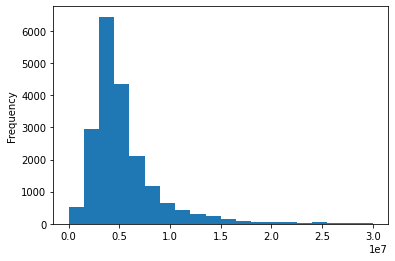

In [95]:
data['last_price'].plot(kind='hist', x='last_price', y = 'count',bins = 20, range=(0,30000000))

Я думаю, этим значением может быть цена в 15 миллионов. 
А ведь есть значения больше 80 миллионов и они вообще все графики силино портят...

In [96]:
data_2 = data.loc[(data['last_price']<= 15000000)& (data['last_price']>= 100000) & (data['days_exposition']<=700)]

In [97]:
print(data_2.loc[:,('last_price', 'locality_name')].sort_values(by = 'last_price', ascending=True).head(40))

       last_price                       locality_name
12598    430000.0               поселок станции Свирь
13753    440000.0                  деревня Старополье
13705    450000.0                деревня Вахнова Кара
14927    450000.0                   деревня Ям-Тесово
8107     450000.0                  деревня Старополье
4813     450000.0          городской поселок Будогощь
18488    470000.0                   поселок Совхозный
15929    470000.0                    деревня Выскатка
19817    470000.0                              Сланцы
13545    480000.0                              Сланцы
5802     490000.0                  деревня Старополье
3701     500000.0                              Сланцы
12593    500000.0                         деревня Бор
18912    520000.0                              Сланцы
10651    530000.0                              Сланцы
6750     550000.0                                Луга
6243     550000.0                            Пикалево
892      550000.0           

In [98]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18436 entries, 0 to 19996
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18436 non-null  int64         
 1   last_price            18436 non-null  float64       
 2   total_area            18436 non-null  float64       
 3   first_day_exposition  18436 non-null  datetime64[ns]
 4   rooms                 18436 non-null  int64         
 5   ceiling_height        10729 non-null  float64       
 6   floors_total          18436 non-null  int64         
 7   living_area           18436 non-null  float64       
 8   floor                 18436 non-null  int64         
 9   is_apartment          18436 non-null  bool          
 10  studio                18436 non-null  bool          
 11  open_plan             18436 non-null  bool          
 12  kitchen_area          18436 non-null  float64       
 13  balcony         

Значений ушло не так много, а результаты мы сейчас посмотрим.

In [99]:
print(data_2['total_area'].corr(data_2['last_price']))
print(data_2['total_area'].corr(data_2['days_exposition']))

0.7441311761429091
0.1193300900182494


<AxesSubplot:xlabel='total_area', ylabel='days_exposition'>

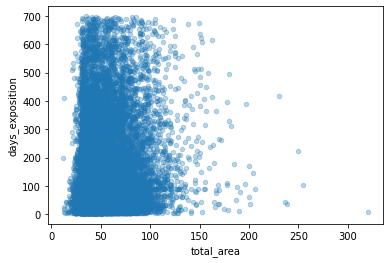

In [125]:
data_2.plot(x='total_area', y='days_exposition', kind='scatter', alpha =0.3)

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

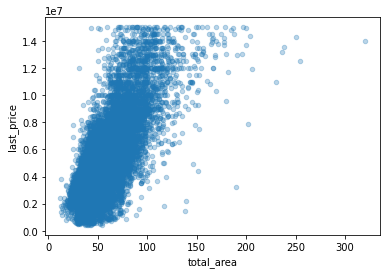

In [126]:
data_2.plot(x='total_area', y='last_price', kind='scatter', alpha =0.3)

In [129]:
data_3 = data_2.loc[data_2['total_area']<=200]
print(data_3['total_area'].corr(data_3['last_price']))
print(data_3['total_area'].corr(data_3['days_exposition']))

0.7474816872857122
0.1224940827359367


<AxesSubplot:xlabel='total_area', ylabel='days_exposition'>

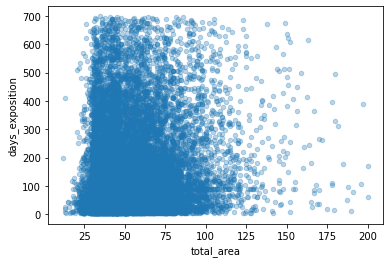

In [134]:
data_3.plot(x='total_area', y='days_exposition', kind='scatter', alpha =0.3)

In [132]:
data_4 = data_3.loc[data_3['total_area']<=100]
print(data_4['total_area'].corr(data_4['last_price']))
print(data_4['total_area'].corr(data_4['days_exposition']))

0.6979389644698862
0.09345378143465814


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

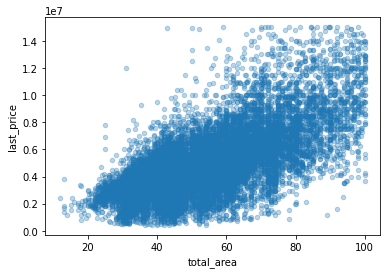

In [135]:
data_4.plot(x='total_area', y='last_price', kind='scatter', alpha =0.3)

In [150]:
data_5 = data_2.loc[(data_2['total_area']<=200) & (data_2['total_area']>=20)]
print(data_5['total_area'].corr(data_5['last_price']))
print(data_5['total_area'].corr(data_5['days_exposition']))

0.746967218486309
0.12146418968770446


In [100]:
print(data_2['living_area'].corr(data_2['last_price']))
print(data_2['living_area'].corr(data_2['days_exposition']))

0.6377238105949695
0.11145813541575023


In [101]:
print(data_2['kitchen_area'].corr(data_2['last_price']))
print(data_2['kitchen_area'].corr(data_2['days_exposition']))

0.5573084110163015
0.06512138101074787


In [102]:
print(data_2['rooms'].corr(data_2['last_price']))
print(data_2['rooms'].corr(data_2['days_exposition']))

0.4940054007661048
0.09409390143154331


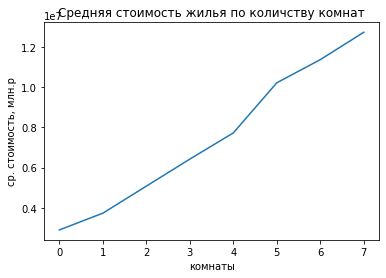

In [154]:
data_2.groupby('rooms')['last_price'].mean().plot(
    x=data_2.index, y='rooms', title='Средняя стоимость жилья по количству комнат',
    xlabel='комнаты', ylabel='ср. стоимость, млн.р'
)
plt.show()

После удаления Аномалий корреляция стала лучше. 

In [103]:
print(data_2.pivot_table(index=['floor_group'], values =['last_price'], aggfunc = ['count', 'mean', 'median']))

                 count          mean     median
            last_price    last_price last_price
floor_group                                    
другой           13628  5.179349e+06  4500000.0
первый            2298  4.113772e+06  3750000.0
последний         2510  4.753230e+06  4100000.0


Теперь четко видно, что последний этаж дороже первого и дешевле остальных. 
Наша идея подтвердилась. 

<AxesSubplot:xlabel='last_price', ylabel='days_exposition'>

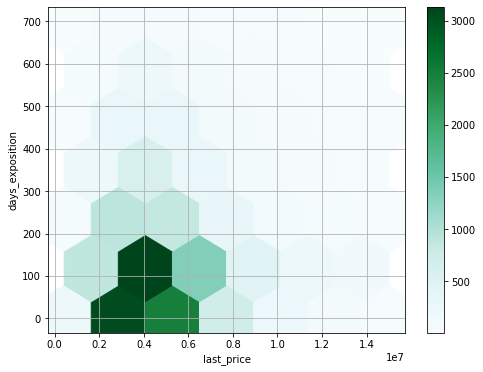

In [104]:
data_2.plot(x='last_price', y='days_exposition', kind='hexbin', gridsize=6, figsize=(8, 6), sharex=False, grid=True)

Средняя квартира стоит около 4 миллионов (+/- 500 тысяч) и продаятся за 60-180 дней.

In [105]:
print(data_2['days_exposition'].describe())

count    18436.000000
mean       144.890649
std        149.257160
min          1.000000
25%         42.000000
50%         88.000000
75%        199.000000
max        699.000000
Name: days_exposition, dtype: float64


Но если вы не визуал, тогда медианное значение 88 дней, а среднее арифметическое - 144 дня.

In [106]:
print(data_2['last_price'].describe())

count    1.843600e+04
mean     4.988513e+06
std      2.569359e+06
min      4.300000e+05
25%      3.300000e+06
50%      4.365000e+06
75%      6.000000e+06
max      1.500000e+07
Name: last_price, dtype: float64


Средняя квартира стоит почти 5 миллионов, а медианная - 4,37 миллиона.

In [107]:
print(data_2['price_sqm'].corr(data_2['days_exposition']))

-0.02513101790634375


<AxesSubplot:xlabel='last_price', ylabel='days_exposition'>

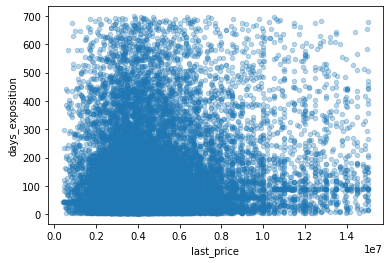

In [120]:
data_2.plot(x='last_price', y='days_exposition', kind='scatter', alpha =0.3)

In [108]:
print(data_2['parks_around3000'].corr(data_2['last_price']))
print(data_2['parks_around3000'].corr(data_2['days_exposition']))

0.25709838633917376
0.02809444144456433


<AxesSubplot:xlabel='parks_around3000', ylabel='days_exposition'>

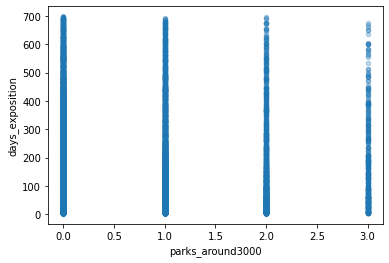

In [123]:
data_2.plot(x='parks_around3000', y='days_exposition', kind='scatter', alpha =0.3)

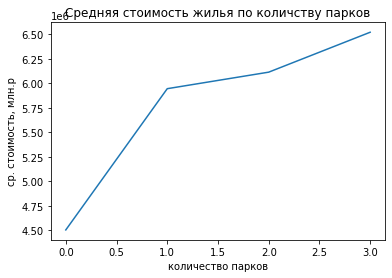

In [124]:
data_2.groupby('parks_around3000')['last_price'].mean().plot(
    x=data_2.index, y='parks_around3000', title='Средняя стоимость жилья по количству парков',
    xlabel='количество парков', ylabel='ср. стоимость, млн.р'
)
plt.show()

In [109]:
print(data_2['ponds_around3000'].corr(data_2['last_price']))
print(data_2['ponds_around3000'].corr(data_2['days_exposition']))

0.2939430319943496
0.0346875162760329


И что-то подсказывает, что корреляция парков и прудов с ценой - не ошибка, а маленькая значимость влияния. 

In [110]:
data_ceiling = data_2.drop(data_2[data_2['ceiling_height'].isna()==True].index)
print(data_ceiling['ponds_around3000'].corr(data_ceiling['last_price']))

0.2769982617348028


Тоже есть корреляция, но не самая значимая.

In [111]:
locality_price = data_2.groupby('locality_name')['price_sqm'].agg(['count', 'median', 'mean'])

In [112]:
locality_price = locality_price.sort_values(by='count', ascending=False)
print(locality_price.head(10))

                   count         median           mean
locality_name                                         
Санкт-Петербург    12015  101724.137931  105764.254961
поселок Мурино       517   86231.884058   85871.729265
поселок Шушары       387   76584.507042   78057.684264
Всеволожск           317   65789.473684   66926.295421
Колпино              294   73356.086462   74520.627742
поселок Парголово    294   91289.206642   89314.394559
деревня Кудрово      275   92000.000000   92866.826593
Пушкин               275   97500.000000  100209.612059
Гатчина              242   67123.541888   67952.793973
Выборг               198   56881.313131   57156.500760


Самая высокая цена квадратного метра в Санкт-Петербурге, а самая низкая - в Выборге. 

In [113]:
data_spb = data_2.loc[data_2['locality_name'] == 'Санкт-Петербург']

In [114]:
data_spb = data_spb.drop(data_spb[data_spb['to_centre_km'].isna()==True].index)
data_spb['to_centre_km'] = data_spb['to_centre_km'].astype('int')
#data_spb.info()
print(data_spb['to_centre_km'].corr(data_spb['last_price']))

-0.3988455400014099


Кореляция средней силы и отрицательная, а это означает, что цена недвижимости снижается по мере удаления от центра города. 

In [115]:
print(data_spb.groupby('to_centre_km')['last_price'].mean())

to_centre_km
0     9.043636e+06
1     9.016282e+06
2     8.811545e+06
3     7.845039e+06
4     8.317911e+06
5     8.298813e+06
6     7.693783e+06
7     7.112488e+06
8     6.907738e+06
9     5.876653e+06
10    5.546036e+06
11    5.424647e+06
12    5.341383e+06
13    5.635801e+06
14    5.304703e+06
15    5.243783e+06
16    5.038256e+06
17    4.870001e+06
18    4.670226e+06
19    4.827787e+06
20    5.329148e+06
21    4.980398e+06
22    4.996320e+06
23    4.538689e+06
24    3.854430e+06
25    4.052840e+06
26    3.943437e+06
27    8.300000e+06
28    5.026429e+06
29    4.050000e+06
Name: last_price, dtype: float64


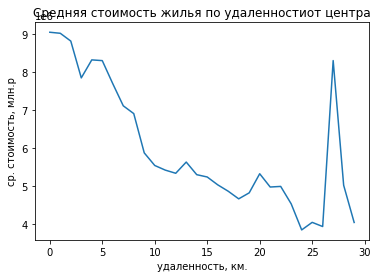

In [116]:
data_spb.groupby('to_centre_km')['last_price'].mean().plot(
    x=data_spb.index, y="to_centre_km", title='Средняя стоимость жилья по удаленностиот центра',
    xlabel='удаленность, км.', ylabel='ср. стоимость, млн.р'
)
plt.show()

<AxesSubplot:xlabel='last_price', ylabel='to_centre_km'>

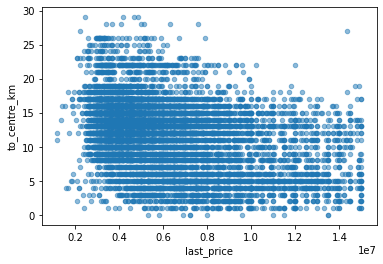

In [117]:
data_spb.plot(x='last_price', y='to_centre_km', kind='scatter', alpha =0.5)

Правый верхний угол пустует, а значит, в чем-то мы правы)

### 5 Общий вывод

Мы провели довльно большое исследование и изучили данные с разных сторон. Мы выяснили, что цена больше всего зависит от площади квартиры, потом от количества комнат, потом от удаленности от центра, потом, от наличие парков и прудов рядом, потом от этажа. 
Было немного непривычно заниматься исследованием в широком смысле слова, когда конечная цель немного размыта и не совсем совпадает с заданием. 
Но в целом было круто.